In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Dropout

In [18]:
df = pd.read_csv('fer2013.csv')

In [19]:
# Preprocess the data
X = np.array(df['pixels'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ')).tolist())
X = X.reshape(-1, 48, 48, 1)  # Assuming images are 48x48 pixels
y = to_categorical(df['emotion'].values)

In [20]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Create a simple CNN model with Batch Normalization
model = models.Sequential()

# First Convolutional Layer with padding='same'
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(48, 48, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Layer with padding='same'
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Layer with padding='same'
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

# Dense Layer with padding='same'
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dropout(0.8))

model.add(layers.Dense(7, activation='softmax'))

In [63]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [35]:
# Save the best model during training
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [69]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), callbacks=[checkpoint])

Epoch 1/20
448/449 [============================>.] - ETA: 0s - loss: 0.2395 - accuracy: 0.9176
Epoch 1: val_accuracy did not improve from 0.57997
449/449 [==============================] - 40s 90ms/step - loss: 0.2393 - accuracy: 0.9177 - val_loss: 2.3323 - val_accuracy: 0.5443
Epoch 2/20
448/449 [============================>.] - ETA: 0s - loss: 0.2230 - accuracy: 0.9231
Epoch 2: val_accuracy did not improve from 0.57997
449/449 [==============================] - 38s 84ms/step - loss: 0.2231 - accuracy: 0.9231 - val_loss: 2.2010 - val_accuracy: 0.5582
Epoch 3/20
448/449 [============================>.] - ETA: 0s - loss: 0.2145 - accuracy: 0.9246
Epoch 3: val_accuracy did not improve from 0.57997
449/449 [==============================] - 37s 82ms/step - loss: 0.2145 - accuracy: 0.9245 - val_loss: 2.5658 - val_accuracy: 0.5365
Epoch 4/20
448/449 [============================>.] - ETA: 0s - loss: 0.2097 - accuracy: 0.9287
Epoch 4: val_accuracy did not improve from 0.57997
449/449 [====

In [70]:
# Evaluate the model
model.load_weights('best_model.h5')  # Load the best weights
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

225/225 [==============================] - 3s 15ms/step


In [71]:
accuracy = accuracy_score(y_true_labels, y_pred_labels)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
classification_rep = classification_report(y_true_labels, y_pred_labels)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.5799665645026469
Confusion Matrix:
[[ 433    2  111   89  187   19  144]
 [  37   21   19    7   13    2    3]
 [ 120    3  367   90  255  110   98]
 [  55    0   41 1467   83   24   95]
 [ 104    2  159   99  604   10  232]
 [  14    0   99   73   24  544   41]
 [  75    1   94  132  237   12  727]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.44      0.48       985
           1       0.72      0.21      0.32       102
           2       0.41      0.35      0.38      1043
           3       0.75      0.83      0.79      1765
           4       0.43      0.50      0.46      1210
           5       0.75      0.68      0.72       795
           6       0.54      0.57      0.56      1278

    accuracy                           0.58      7178
   macro avg       0.59      0.51      0.53      7178
weighted avg       0.58      0.58      0.58      7178



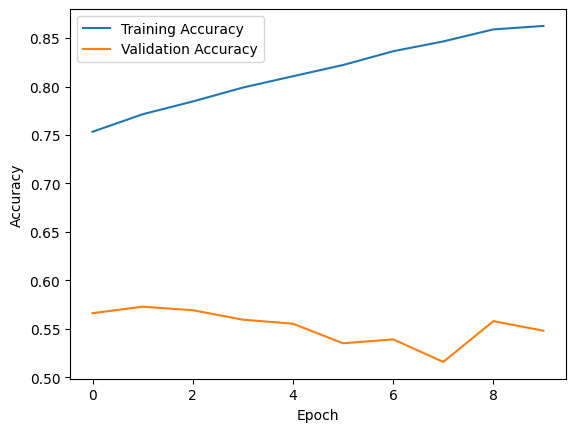

In [44]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

(48, 48)


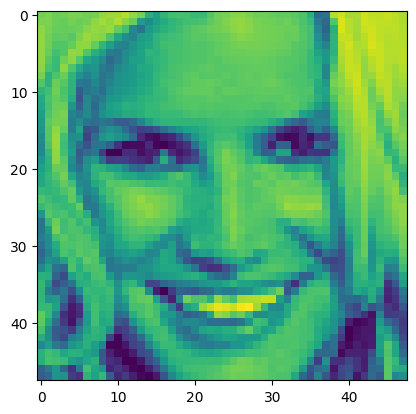

In [45]:
img = image.load_img("pics\happy3.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape) #prints (48,48) that is the shape of our image

In [46]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [47]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 [==============================] - 0s 106ms/step
[1.5008413e-06, 3.6390193e-07, 3.3208522e-07, 0.99997914, 3.9727342e-06, 6.018232e-07, 1.4151427e-05]


In [48]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Happy


In [49]:
print(accuracy)

0.5728615213151296
